In [3]:
import numpy as np
import pandas as pd

In [32]:
df = pd.read_csv("Titanic_passengers.csv")
df.head()

,Surname,First Names,Age,Boarded,Class,Sex,Status
0,Ab ī-Al-Munà,Mr Nās īf Qāsim,26,Cherbourg,3rd,Male,Alive
1,Abbing,Mr Anthony,42,Southampton,3rd,Male,Dead
2,Abbott,Mr Eugene Joseph,14,Southampton,3rd,Male,Dead
3,Abbott,Mrs Rhoda Mary “Rosa”,39,Southampton,3rd,Female,Alive
4,Abbott,Mr Rossmore Edward,16,Southampton,3rd,Male,Dead


In [33]:
pass_data = df[['Age', 'Class', 'Sex']]
pass_label = df['Status'].astype(str)

In [34]:
from sklearn.preprocessing import LabelEncoder

def categorize_age(age):
  return (age // 10)

pass_data['Age'] = pd.to_numeric(pass_data['Age'], errors='coerce')
pass_data['Age'].fillna(pass_data['Age'].mean(), inplace=True)
pass_data['Age'] = pass_data['Age'].astype(int)
pass_data['Age'] = pass_data['Age'].apply(categorize_age)

"""
encoder = LabelEncoder()
pass_data['Boarded'] = pass_data['Boarded'].str.strip().str.lower()
pass_data['Boarded'] = encoder.fit_transform(pass_data['Boarded'])
"""

encoder = LabelEncoder()
pass_data['Class'] = encoder.fit_transform(pass_data['Class'])

encoder = LabelEncoder()
pass_data['Sex'] = encoder.fit_transform(pass_data['Sex'])


/var/folders/9x/w6hlwnl17tn5m06v9vh_m8jh0000gn/T/ipykernel_76834/469835442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pass_data['Age'] = pd.to_numeric(pass_data['Age'], errors='coerce')
/var/folders/9x/w6hlwnl17tn5m06v9vh_m8jh0000gn/T/ipykernel_76834/469835442.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation in

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(pass_data, pass_label, test_size = 0.35, random_state = 42)
print(X_train)
print(y_train)

      Age  Class  Sex
701     0      2    0
423     4      0    0
984     0      1    0
1309    2      2    1
886     2      2    1
...   ...    ...  ...
1095    4      0    0
1130    2      0    0
1294    2      2    1
860     2      2    1
1126    1      0    0

[856 rows x 3 columns]
701      Dead
423     Alive
984     Alive
1309     Dead
886      Dead
        ...  
1095    Alive
1130    Alive
1294     Dead
860      Dead
1126    Alive
Name: Status, Length: 856, dtype: object


[Text(0.49583333333333335, 0.9166666666666666, 'x[2] <= 0.5\ngini = 0.463\nsamples = 856\nvalue = [311, 545]'),
 Text(0.3, 0.75, 'x[1] <= 1.5\ngini = 0.443\nsamples = 317\nvalue = [212.0, 105.0]'),
 Text(0.3979166666666667, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'x[1] <= 0.5\ngini = 0.255\nsamples = 173\nvalue = [147, 26]'),
 Text(0.1, 0.4166666666666667, 'x[0] <= 4.5\ngini = 0.115\nsamples = 98\nvalue = [92, 6]'),
 Text(0.06666666666666667, 0.25, 'x[0] <= 3.5\ngini = 0.049\nsamples = 80\nvalue = [78, 2]'),
 Text(0.03333333333333333, 0.08333333333333333, 'gini = 0.034\nsamples = 57\nvalue = [56, 1]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.083\nsamples = 23\nvalue = [22, 1]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.346\nsamples = 18\nvalue = [14, 4]'),
 Text(0.23333333333333334, 0.4166666666666667, 'x[0] <= 4.5\ngini = 0.391\nsamples = 75\nvalue = [55.0, 20.0]'),
 Text(0.2, 0.25, 'x[0] <= 0.5\ngini = 0.334\nsamples = 66\nvalue = [52, 14]'),

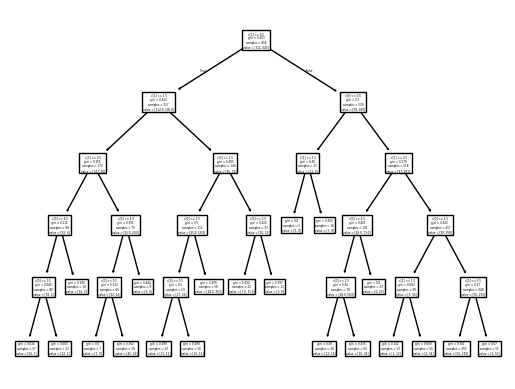

In [40]:
from sklearn import tree

det_tree = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 8, min_samples_leaf = 5, random_state = 42)
det_tree = det_tree.fit(X_train, y_train)
tree.plot_tree(det_tree)

In [42]:
from sklearn.metrics import accuracy_score

preds = det_tree.predict(X_test)
accuracy = accuracy_score(preds, y_test)
print("The accuracy of the Decision Tree model is " + str(round(accuracy, 3)))

The accuracy of the Decision Tree model is 0.781
